<a href="https://colab.research.google.com/github/trd44/Caltech-AIML-Bootcamp/blob/main/Gene_Expression_and_Cancer_Healthcare_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Healthcare Capstone Project

In [ ]:
# Mounting the drive
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Week 1 Tasks: Exploratory Data Analysis

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


Load the Data

In [ ]:
labels = pd.read_csv('/content/drive/MyDrive/Datasets/HealthcareCapstoneProject/labels.csv', index_col=0)
data = pd.read_csv('/content/drive/MyDrive/Datasets/HealthcareCapstoneProject/data.csv', index_col=0)

### Merge both of the Datasets

In [ ]:
df = pd.concat([labels, data],axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 801 entries, sample_0 to sample_800
Columns: 20532 entries, Class to gene_20530
dtypes: float64(20531), object(1)
memory usage: 125.5+ MB


In [ ]:
df.head()

,Class,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
sample_0,PRAD,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
sample_1,LUAD,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
sample_2,PRAD,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
sample_3,PRAD,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
sample_4,BRCA,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
gene_0,801.0,0.026642,0.136850,0.000000,0.000000,0.000000,0.000000,1.482332
gene_1,801.0,3.010909,1.200828,0.000000,2.299039,3.143687,3.883484,6.237034
gene_2,801.0,3.095350,1.065601,0.000000,2.390365,3.127006,3.802534,6.063484
gene_3,801.0,6.722305,0.638819,5.009284,6.303346,6.655893,7.038447,10.129528
gene_4,801.0,9.813612,0.506537,8.435999,9.464466,9.791599,10.142324,11.355621
...,...,...,...,...,...,...,...,...
gene_20526,801.0,11.742228,0.670371,9.045255,11.315857,11.749802,12.177852,13.715361
gene_20527,801.0,10.155271,0.580569,7.530141,9.836525,10.191207,10.578561,11.675653
gene_20528,801.0,9.590726,0.563849,7.864533,9.244219,9.566511,9.917888,12.813320
gene_20529,801.0,5.528177,2.073859,0.593975,4.092385,5.218618,6.876382,11.205836


In [ ]:
df['Class'].nunique()

5

In [ ]:
df['Class'].value_counts()

BRCA    300
KIRC    146
LUAD    141
PRAD    136
COAD     78
Name: Class, dtype: int64

In [ ]:
df.isnull().sum().sort_values(ascending=True)

Class         0
gene_13691    0
gene_13690    0
gene_13689    0
gene_13688    0
             ..
gene_6839     0
gene_6838     0
gene_6837     0
gene_6735     0
gene_20530    0
Length: 20532, dtype: int64

In [ ]:
df.duplicated().sum()

0

### Plot the merged data as a hierarchically-clustered heatmap

In [ ]:
heatmap_data = pd.pivot_table(df,index=["Class"])

/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


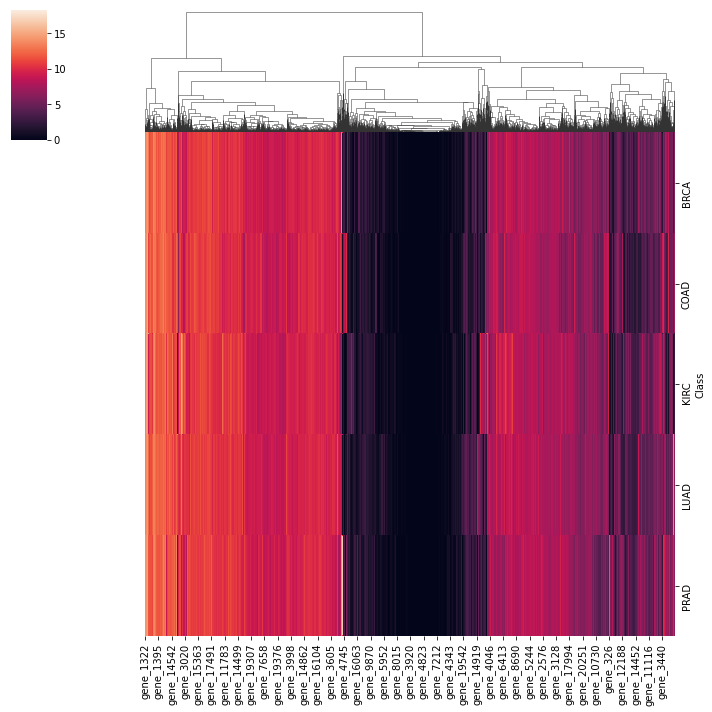

In [ ]:
sns.clustermap(heatmap_data,method="complete",metric="euclidean", row_cluster=False)

### Perform Null-hypothesis testing

In [ ]:
from scipy import stats
from sklearn import preprocessing

Looking for the genes with the highest standard deviation to perform null hypothesis testing on. 

In [ ]:
vals = heatmap_data.values.T
min_max_scaler = preprocessing.MinMaxScaler()
vals_scaled = min_max_scaler.fit_transform(vals)
heatmap_data_scaled = pd.DataFrame(vals_scaled.T, columns=heatmap_data.columns)

In [ ]:
heatmap_data_scaled.describe()

,gene_0,gene_1,gene_10,gene_100,gene_1000,gene_10000,gene_10001,gene_10002,gene_10003,gene_10004,...,gene_9990,gene_9991,gene_9992,gene_9993,gene_9994,gene_9995,gene_9996,gene_9997,gene_9998,gene_9999
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,0.001738,0.181712,0.040391,0.620780,0.610728,0.166530,0.410859,0.453980,0.358123,0.431184,...,0.120919,0.157367,0.122514,0.120292,0.126772,0.164623,0.009978,0.148189,0.006091,0.397738
std,0.000857,0.025163,0.017957,0.036446,0.043932,0.059156,0.047237,0.022380,0.092795,0.022686,...,0.024984,0.128530,0.029409,0.019820,0.060449,0.024782,0.012171,0.028696,0.002740,0.014445
min,0.000687,0.142909,0.021287,0.563838,0.546538,0.098433,0.329284,0.419966,0.225424,0.405571,...,0.089020,0.021141,0.092342,0.096503,0.076840,0.142768,0.002509,0.127051,0.003376,0.383135
25%,0.001323,0.171829,0.032921,0.610159,0.592897,0.106916,0.410929,0.446106,0.312345,0.414638,...,0.108753,0.035547,0.105053,0.111511,0.093422,0.146686,0.002815,0.136083,0.003873,0.389541
50%,0.001455,0.188680,0.036232,0.627252,0.623455,0.197139,0.434276,0.458077,0.366477,0.426332,...,0.119158,0.167088,0.109248,0.111609,0.102630,0.150896,0.005382,0.136932,0.005206,0.394334
75%,0.002450,0.200280,0.041980,0.646322,0.626418,0.206272,0.435706,0.467703,0.433208,0.454322,...,0.132042,0.251912,0.142621,0.139929,0.132226,0.187095,0.007772,0.142302,0.008858,0.400857
max,0.002774,0.204862,0.069533,0.656328,0.664334,0.223891,0.444101,0.478048,0.453158,0.455057,...,0.155624,0.311150,0.163308,0.141909,0.228743,0.195669,0.031413,0.198578,0.009141,0.420821


In [ ]:
heatmap_data_scaled.loc[:, heatmap_data_scaled.std() > 0.35].describe()

,gene_15898,gene_3540,gene_3541,gene_9175,gene_9176
count,5.000000,5.000000,5.000000,5.000000,5.000000
mean,0.237668,0.475602,0.520155,0.230536,0.255510
std,0.390868,0.372921,0.353788,0.385606,0.420582
min,0.040724,0.036313,0.049171,0.021675,0.011263
25%,0.064274,0.242109,0.293300,0.051736,0.024405
50%,0.064604,0.407797,0.544638,0.062847,0.076183
75%,0.082364,0.723516,0.850895,0.097817,0.165698
max,0.936372,0.968277,0.862771,0.918606,1.000000


In [ ]:
for col in heatmap_data_scaled.loc[:, heatmap_data_scaled.std() > 0.35]:
  print(df.groupby('Class')[col].mean())

Class
BRCA     1.067688
COAD     1.382390
KIRC     1.078570
LUAD    15.700952
PRAD     0.742695
Name: gene_15898, dtype: float64
Class
BRCA     6.739489
COAD    16.251452
KIRC     0.609368
LUAD    12.131822
PRAD     4.415432
Name: gene_3540, dtype: float64
Class
BRCA     9.000999
COAD    14.480650
KIRC     0.825130
LUAD    14.267683
PRAD     5.349038
Name: gene_3541, dtype: float64
Class
BRCA     1.616576
COAD     1.054822
KIRC     0.363720
LUAD     0.867502
PRAD    16.752995
Name: gene_9175, dtype: float64
Class
BRCA     1.259048
COAD     2.781059
KIRC     0.409529
LUAD     0.188861
PRAD    18.237407
Name: gene_9176, dtype: float64


These all seem to have some large ranging values

**Null Hypothesis:** There **is not** a statistically significant relationaship between the gene and the label variable.

**Alternative Hypothesis:** There **is** a statistically significant relationaship between the gene and the label variable.

In [ ]:
brca = df[df['Class']=='BRCA'][['gene_15898', 'gene_3540', 'gene_3541', 'gene_9175', 'gene_9176']]
coad = df[df['Class']=='COAD'][['gene_15898', 'gene_3540', 'gene_3541', 'gene_9175', 'gene_9176']]
kirc = df[df['Class']=='KIRC'][['gene_15898', 'gene_3540', 'gene_3541', 'gene_9175', 'gene_9176']]
luad = df[df['Class']=='LUAD'][['gene_15898', 'gene_3540', 'gene_3541', 'gene_9175', 'gene_9176']]
prad = df[df['Class']=='PRAD'][['gene_15898', 'gene_3540', 'gene_3541', 'gene_9175', 'gene_9176']]

In [ ]:
stats.f_oneway(brca, coad, kirc, luad, prad)

F_onewayResult(statistic=array([1905.19087886,  477.52870809,  634.0166968 , 4194.48933628,
       3463.55032802]), pvalue=array([0.00000000e+000, 8.70450817e-210, 1.01416975e-245, 0.00000000e+000,
       0.00000000e+000]))

The p-value for each of these genese is below 0.05 meaning we can reject the null hypothesis for these five genes. 

## Week 2: Dimensionality Reduction

Each sample has expression values for around 20K genes. However, it may not be necessary to include all 20K genes expression values to analyze each cancer type. Therefore, we will identify a smaller set of attributes which will then be used to fit multiclass classification models. So, the first task targets the dimensionality reduction using various techniques such as,
PCA, LDA, and t-SNE.

Input: Complete dataset including all genes (20531)

Output: Selected Genes from each dimensionality reduction method

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [ ]:
sc = StandardScaler()

In [ ]:
X = df.drop(['Class'], axis=1)
y = df['Class'].values.reshape(-1,1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=0)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((600, 20531), (201, 20531), (600, 1), (201, 1))

In [ ]:
X_train_scaled = sc.fit_transform(X_train)

In [ ]:
X_train_scaled

array([[-0.20534083,  0.78240123, -0.03427337, ..., -1.20925347,
         1.18672905, -0.24570272],
       [-0.20534083, -0.0361104 ,  1.61043146, ...,  0.09439164,
         0.7866146 , -0.24570272],
       [-0.20534083,  0.25295667, -0.07779959, ...,  2.79411593,
         2.05263418, -0.24570272],
       ...,
       [-0.20534083, -0.34273235, -1.21520081, ...,  1.22184566,
        -1.18431847,  4.40068154],
       [-0.20534083, -0.23980551, -0.10950566, ..., -0.32056994,
        -0.15082696, -0.24570272],
       [-0.20534083, -0.5366763 ,  1.17890112, ..., -0.49099734,
         0.15467683, -0.24570272]])

In [ ]:
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)

In [ ]:
X_train_pca.shape

(600, 409)

In [ ]:
y_train_df = pd.DataFrame(y_train, columns=['Class'])

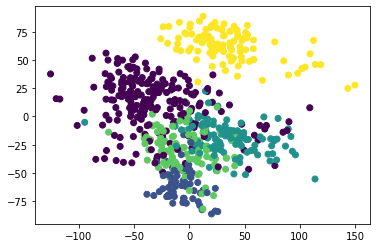

In [ ]:
plt.scatter(X_train_pca[:,1],X_train_pca[:,2],c=y_train_df['Class'].astype('category').cat.codes)

In [ ]:
# for i in range(X_train_pca.shape[1]):
#   for j in range(i+1,X_train_pca.shape[1]):
#     plt.figure(figsize=(3,3))

#     plt.scatter(X_train_pca[:,i],
#                 X_train_pca[:,j],
#                 c=y_train_df['Class'].astype('category').cat.codes)
    

#     plt.xlabel("Component "+str(i))
#     plt.ylabel("Component "+str(j))
#     plt.show()

## Week 3: Clustering Genes and Samples
Our next goal is to identify groups of genes that behave similarly across samples and identify the distribution of samples corresponding to each cancer type. Therefore, this task focuses on applying various clustering techniques, e.g., k-means, hierarchical, and mean-shift clustering, on genes and samples.

### First, apply the given clustering technique on all genes to identify:

#### 1. Genes whose expression values are similar across all samples

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
df_pca = pd.DataFrame(df.drop(['Class'], axis =1))

In [ ]:
def plot_sse_vs_clusters(dataset, max_clusters, step=1):
  sse = {}
  
  for k in range(1,max_clusters,step):
    kmeans = KMeans(n_clusters=k, max_iter = 1000, random_state = 0).fit(dataset)
    sse[k] = kmeans.inertia_

  plt.figure()
  plt.plot(list(sse.keys()), list(sse.values()), 'bx-')
  plt.xlabel("Number of cluster")
  plt.ylabel("SSE")
  plt.show()


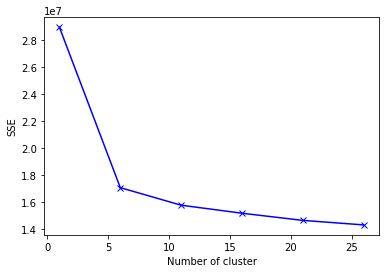

In [ ]:
plot_sse_vs_clusters(df_pca, 30, 5)

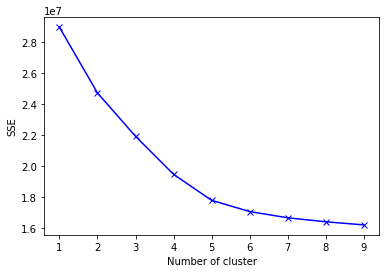

In [ ]:
plot_sse_vs_clusters(df_pca, 10, 1)


There is no clear elbow in the plot. I think 5 clusters could be the optimal number.


In [ ]:
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(df_pca)
df['KLabels'] = kmeans.predict(df_pca)

In [ ]:
df['KLabels'].value_counts()

2    303
3    145
1    141
0    136
4     76
Name: KLabels, dtype: int64

In [ ]:
# df_scaled = pd.DataFrame(min_max_scaler.fit_transform(df.groupby('KLabels').mean()),columns=X_train.columns)
df_kl = df.groupby('KLabels').mean()

In [ ]:
df_kl.std().sort_values(ascending=True)

gene_16739    0.000000
gene_16804    0.000000
gene_16805    0.000000
gene_16806    0.000000
gene_16807    0.000000
                ...   
gene_3541     5.895283
gene_3540     6.248574
gene_15898    6.502424
gene_9175     7.075398
gene_9176     7.704322
Length: 20531, dtype: float64

In [ ]:
df_temp = pd.DataFrame(df_kl.std(), columns=['std'])

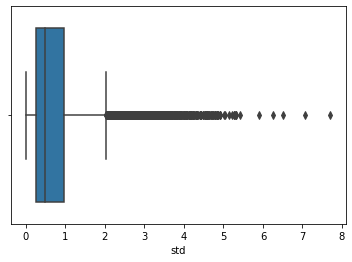

In [ ]:
sns.boxplot(x=df_temp['std'])


In [ ]:
print(df_kl.std().sort_values(ascending=True)[1000])
print(df_kl.std().sort_values(ascending=True)[2500])
print(df_kl.std().sort_values(ascending=True)[5000])
print(df_kl.std().sort_values(ascending=True)[10000])
print(df_kl.std().sort_values(ascending=True)[15000])
print(df_kl.std().sort_values(ascending=True)[20000])

0.03414881616247402
0.1483382974880354
0.24774339508342694
0.4590672798543773
0.9122755274017963
2.630200658422561


75% of the genes have a standard deviation of less than one between the 5 different groups of cancer. There are also many outliers.

###### Code not being used

In [ ]:
# for col in ['gene_9176', 'gene_9175', 'gene_15898', 'gene_3540', 'gene_3541']:
#   print(df.groupby('KLabels')[col].mean())

In [ ]:
# df[['gene_9176', 'gene_9175', 'gene_15898', 'gene_3540', 'gene_3541','KLabels']].boxplot(by = 'KLabels', figsize = (20, 20))

# plt.show()

From these boxplots, we can see: 
* Genes 9175 and 9176 are both storngly correlated with Cluster 0.
* Gene 15898 is strongly associated with Cluster 1
* Genes 3540 and 3541 are strongly associated with Clusters 1 and 4


In [ ]:
# plt.scatter(df.iloc[:, 9177], 
#             df.iloc[:, 9176], 
#             c=df['KLabels'].astype('category').cat.codes)

It's kind of difficult to draw conclusion about which genes form the clusters from these style scatter plots. 

#### 2. Genes whose expression values are similar across samples of each cancer type 

##### BRCA

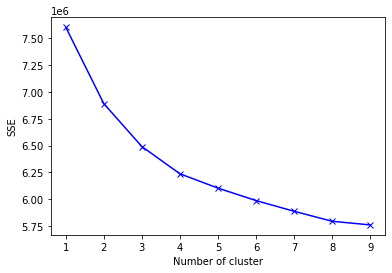

In [ ]:
brca_km = df[df['Class']=='BRCA']
brca_km = brca_km.drop(['Class'],axis=1)

plot_sse_vs_clusters(brca_km, 10)

In [ ]:
kmeans_brca = KMeans(n_clusters=4, random_state=0)
kmeans_brca.fit(brca_km)
brca_km['KLabels'] = kmeans_brca.predict(brca_km)
brca_km['KLabels'].value_counts()

3    112
0     99
2     51
1     38
Name: KLabels, dtype: int64

In [ ]:
def cluster_box_plot(data):
  # data = data.groupby('KLabels').mean()
  data_temp = pd.DataFrame(data.std(), columns=['std'])
  sns.boxplot(x=data_temp['std'])
  plt.show()

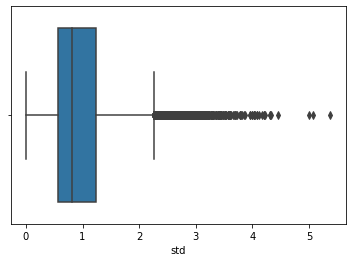

In [ ]:
cluster_box_plot(brca_km)

The vast majority of gene expressions in the BRCA group have a standard deviation of less than 1.5. There are also many outliers. 

##### COAD

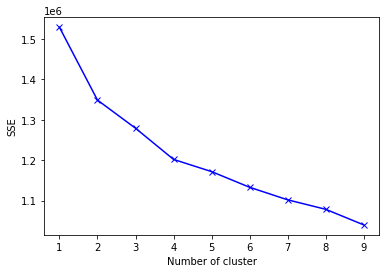

In [ ]:
coad_km = df[df['Class']=='COAD']
coad_km = coad_km.drop(['Class'],axis=1)
plot_sse_vs_clusters(coad_km, 10)

In [ ]:
# This function fits the KMeans data and makes boxplots groupes by the clustes
def fit_and_get_vcs(data, nclu):
  kmeans_coad = KMeans(n_clusters=nclu, random_state=0)
  kmeans_coad.fit(data)
  data['KLabels'] = kmeans_coad.predict(data)
  print(data['KLabels'].value_counts())

  data_kl = data.groupby('KLabels').mean()
  std = data_kl.std().sort_values(ascending=False)
  labels = ['KLabels']
  for i in range(6):
    labels.append(std.index[i])

  data[labels].boxplot(by = 'KLabels', figsize = (20, 20))

  plt.show()

  return data


In [ ]:
# coad_km = fit_and_get_vcs(coad_km, 4)

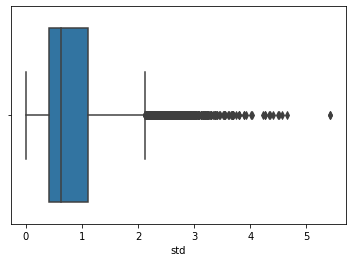

In [ ]:
cluster_box_plot(coad_km)

The vast majority of gene expressions in the COAD group have a standard deviation of less than 1.5. There are also many outliers. 

##### KIRC

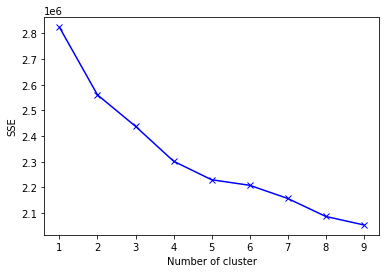

In [ ]:
kirc_km = df[df['Class']=='KIRC']
kirc_km = kirc_km.drop(['Class'],axis=1)
plot_sse_vs_clusters(kirc_km,10)

In [ ]:
# kirc_km = fit_and_get_vcs(kirc_km, 5)

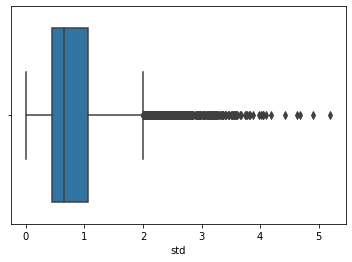

In [ ]:
cluster_box_plot(kirc_km)

The vast majority of gene expressions in the KIRC group have a standard deviation of less than 1.5. There are also many outliers. 

##### LUAD

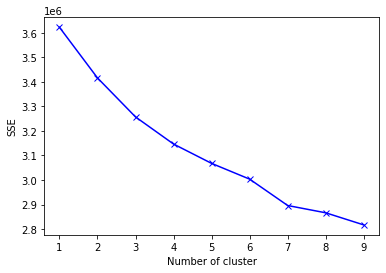

In [ ]:
luad_km = df[df['Class']=='LUAD']
luad_km = luad_km.drop(['Class'],axis=1)
plot_sse_vs_clusters(luad_km, 10)

In [ ]:
# luad_km = fit_and_get_vcs(luad_km, 7)

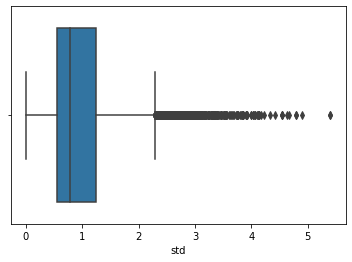

In [ ]:
cluster_box_plot(luad_km)

The vast majority of gene expressions in the LUAD group have a standard deviation of less than 1.5. There are also many outliers. 

##### PRAD

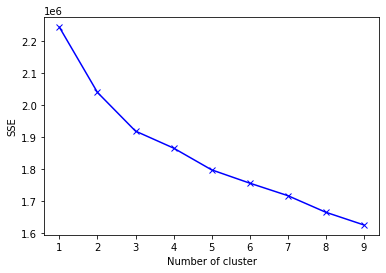

In [ ]:
prad_km = df[df['Class']=='PRAD']
prad_km = prad_km.drop(['Class'],axis=1)
plot_sse_vs_clusters(prad_km, 10)

In [ ]:
# prad_km = fit_and_get_vcs(prad_km,5)

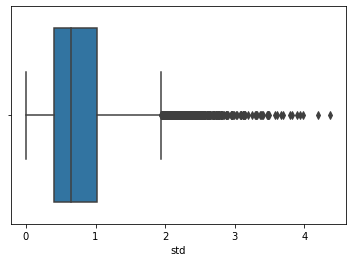

In [ ]:
cluster_box_plot(prad_km)

The vast majority of gene expressions in the PRAD group have a standard deviation of less than 1.5. There are also many outliers. 

### Next, apply the given clustering technique on all samples to identify:

1. Samples of the same class (cancer type) which also correspond to the same cluster

2. Samples identified to be belonging to another cluster but also to the same class (cancer type)

In [ ]:
df_class_and_klabels = df[['Class','KLabels']]

In [ ]:
print(df_class_and_klabels[df_class_and_klabels['Class'] == 'BRCA'].value_counts())
print(df_class_and_klabels[df_class_and_klabels['Class'] == 'COAD'].value_counts())
print(df_class_and_klabels[df_class_and_klabels['Class'] == 'KIRC'].value_counts())
print(df_class_and_klabels[df_class_and_klabels['Class'] == 'LUAD'].value_counts())
print(df_class_and_klabels[df_class_and_klabels['Class'] == 'PRAD'].value_counts())

Class  KLabels
BRCA   2          300
dtype: int64
Class  KLabels
COAD   4          76
       1           2
dtype: int64
Class  KLabels
KIRC   3          145
       2            1
dtype: int64
Class  KLabels
LUAD   1          139
       2            2
dtype: int64
Class  KLabels
PRAD   0          136
dtype: int64


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
df_class_and_klabels.loc[df_class_and_klabels['KLabels'] == 0, 'Pred_Class'] = 'PRAD'
df_class_and_klabels.loc[df_class_and_klabels['KLabels'] == 1, 'Pred_Class'] = 'LUAD'
df_class_and_klabels.loc[df_class_and_klabels['KLabels'] == 2, 'Pred_Class'] = 'BRCA'
df_class_and_klabels.loc[df_class_and_klabels['KLabels'] == 3, 'Pred_Class'] = 'KIRC'
df_class_and_klabels.loc[df_class_and_klabels['KLabels'] == 4, 'Pred_Class'] = 'COAD'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


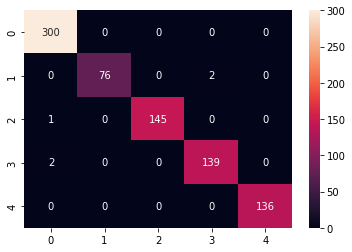

In [ ]:
cm = confusion_matrix(y_true=df_class_and_klabels['Class'], y_pred=df_class_and_klabels['Pred_Class'])
sns.heatmap(cm, annot = True,  fmt = '.0f')

We can see in the confusion matrix that the Kmeans clusters strongly correspond to the different types of Cancer. There are only a few cases where a few samples were put into a cluster that didn't correspond to the cancer it had.

## Week 4: Building Classification Model(s) with Feature Selection

Our final task is to build a robust classification model(s) for identifying each type of cancer.

### 1. Build a classification model(s) using multiclass SVM, Random Forest, and Deep Neural Network to classify the input data into five cancer types

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_estimator = RandomForestClassifier(criterion='entropy')

In [ ]:
rf_estimator.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(criterion='entropy')

In [ ]:
y_pred = rf_estimator.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report

def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    
    cm = confusion_matrix(actual, predicted)
    
    plt.figure(figsize = (8, 5))
    
    sns.heatmap(cm, annot = True,  fmt = '.0f')
    
    plt.ylabel('Actual')
    
    plt.xlabel('Predicted')
    
    plt.show()

              precision    recall  f1-score   support

        BRCA       1.00      1.00      1.00        85
        COAD       1.00      1.00      1.00        17
        KIRC       1.00      1.00      1.00        34
        LUAD       1.00      1.00      1.00        33
        PRAD       1.00      1.00      1.00        32

    accuracy                           1.00       201
   macro avg       1.00      1.00      1.00       201
weighted avg       1.00      1.00      1.00       201



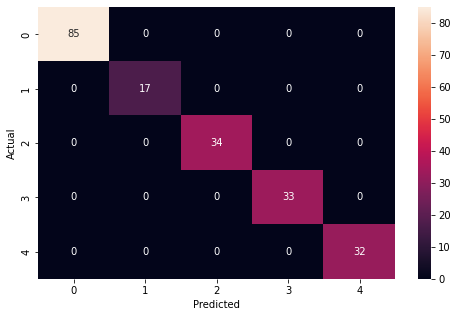

In [ ]:
metrics_score(y_test, y_pred)

This random forest classifier was able to classify the cancers with perfect accuracy. 

In [ ]:
from sklearn import svm

### 2. Apply the feature selection algorithms, forward selection, and backward elimination to refine selected attributes (selected in Task-2) using the classification model from the previous step



In [ ]:
from sklearn.feature_selection import SelectFromModel


In [ ]:
embeded_rf_selector = SelectFromModel(rf_estimator)
embeded_rf_selector.fit(X_train, y_train)

embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_from_model.py:267: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


1176 selected features


In [ ]:
# print(embeded_rf_feature)

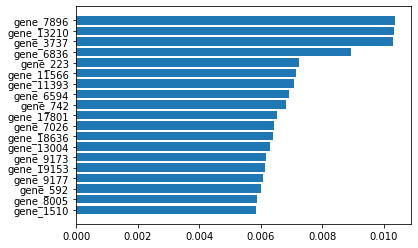

In [ ]:
f_i = list(zip(X_train, rf_estimator.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_i[-20:-1]],[x[1] for x in f_i[-20:-1]])

plt.show()

I identified ['gene_15898', 'gene_3540', 'gene_3541', 'gene_9175', 'gene_9176'] as the important features but they do not seem to appear in the top 20 genes. 

In [ ]:

# import sys
# import joblib

# sys.modules['sklearn.externals.joblib'] = joblib

# from mlxtend.feature_selection import SequentialFeatureSelector as sfs

# sfs1 = sfs(rf_estimator,
#            k_features=100,
#            forward=True,
#            floating=False,
#            verbose=0,
#            scoring='accuracy',
#            cv=5)

# sfs1 = sfs1.fit(X_train,y_train)


The code above ran for 30 mins without finishing.

### 3. Validate the genes selected from the last step using statistical significance testing (t-test for one vs. all and F-test)

In [ ]:
brca = df[df['Class']=='BRCA'][['gene_7896', 'gene_13210', 'gene_3737', 'gene_6836', 'gene_223']]
coad = df[df['Class']=='COAD'][['gene_7896', 'gene_13210', 'gene_3737', 'gene_6836', 'gene_223']]
kirc = df[df['Class']=='KIRC'][['gene_7896', 'gene_13210', 'gene_3737', 'gene_6836', 'gene_223']]
luad = df[df['Class']=='LUAD'][['gene_7896', 'gene_13210', 'gene_3737', 'gene_6836', 'gene_223']]
prad = df[df['Class']=='PRAD'][['gene_7896', 'gene_13210', 'gene_3737', 'gene_6836', 'gene_223']]

In [ ]:
stats.f_oneway(brca, coad, kirc, luad, prad)

F_onewayResult(statistic=array([1753.18349299, 1127.29147591, 2046.82713742,  652.53289919,
        725.52646516]), pvalue=array([0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 1.61830466e-249,
       1.00839180e-263]))

All of the genes identified in the feature selection step appear to have very low p-values indicating that they are statistically significant.